In [1]:
# initialisation des dependances

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
#  I/ observation des données

In [3]:
# chargement des données
df_events = pd.read_csv('../data/events.csv')

In [9]:
# echantillon de 5 lignes du dataframe

print("Echantillon de 5 lignes du dataframe events:")
print(df_events.head(5))

Echantillon de 5 lignes du dataframe events:
       timestamp  visitorid event  itemid  transactionid
0  1433221332117     257597  view  355908            NaN
1  1433224214164     992329  view  248676            NaN
2  1433221999827     111016  view  318965            NaN
3  1433221955914     483717  view  253185            NaN
4  1433221337106     951259  view  367447            NaN


In [4]:
# type d'evenements présents dans le dataframe et volumetrie associée

event_type = df_events['event'].value_counts()

print("\nTypes d'événements présents dans le dataframe ")
print(event_type)


Types d'événements présents dans le dataframe 
event
view           2664312
addtocart        69332
transaction      22457
Name: count, dtype: int64



Proportion d'événements 'view': 96.67%
Proportion d'événements 'add_to_cart': 2.52%


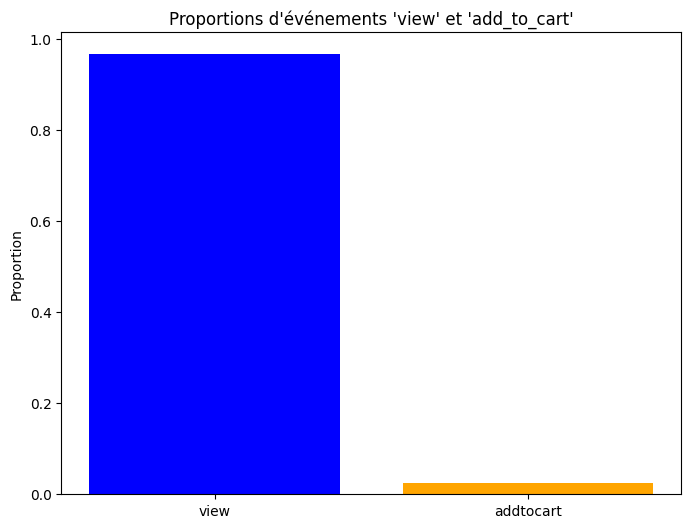

In [5]:
# comparaison des proportions entre les evements add_to_cart et view 

# recuperation des dataframes pour chaque type d'evenement
df_view = df_events[df_events['event'] == 'view']
df_add_to_cart = df_events[df_events['event'] == 'addtocart']

# calcul des proportions
total_events = len(df_events)
proportion_view = len(df_view) / total_events
proportion_add_to_cart = len(df_add_to_cart) / total_events

print(f"\nProportion d'événements 'view': {proportion_view:.2%}")
print(f"Proportion d'événements 'add_to_cart': {proportion_add_to_cart:.2%}")


# visualisation des proportions
labels = ['view', 'addtocart']
proportions = [proportion_view, proportion_add_to_cart]

plt.figure(figsize=(8, 6))
plt.bar(labels, proportions, color=['blue', 'orange'])
plt.ylabel('Proportion')
plt.title("Proportions d'événements 'view' et 'add_to_cart'")
plt.show()

In [ ]:
#  II/ Nettoyage & Exploration

In [6]:
# conservation uniquements des evenements de type view et add_to_cart

df_events = df_events[df_events['event'].isin(['view', 'addtocart'])]

print("\nDataframe après conservation des événements 'view' et 'add_to_cart':")
print(df_events.head(5))


Dataframe après conservation des événements 'view' et 'add_to_cart':
       timestamp  visitorid event  itemid  transactionid
0  1433221332117     257597  view  355908            NaN
1  1433224214164     992329  view  248676            NaN
2  1433221999827     111016  view  318965            NaN
3  1433221955914     483717  view  253185            NaN
4  1433221337106     951259  view  367447            NaN


In [15]:
# Exploration des données pour identifier  les valeurs manquantes , nombre d’événements par type , visiteurs uniques

# vérification des valeurs manquantes
missing_values = df_events.isnull().sum()
print("\nValeurs manquantes par colonne:")
print(missing_values)

# nombre d’événements par type
event_counts = df_events['event'].value_counts()
print("\nNombre d'événements par type:")
print(event_counts)

# nombre de visiteurs uniques
nbr_unique_visitors = df_events['visitorid'].nunique()
print(f"\nNombre de visiteurs uniques: {nbr_unique_visitors}")




Valeurs manquantes par colonne:
timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
dtype: int64

Nombre d'événements par type:
event
view         2664312
addtocart      69332
Name: count, dtype: int64

Nombre de visiteurs uniques: 1407500


In [ ]:
# III/ Simulation d’un A/B Test

In [14]:
# Attribution aléatoire des visiteurs à deux groupes (A et B)

unique_visitors = df_events['visitorid'].unique()
groups = np.random.choice(['A', 'B'], size=len(unique_visitors))

print("\nAttribution aléatoire des visiteurs aux groupes A et B:")
print(groups)


Attribution aléatoire des visiteurs aux groupes A et B:
['B' 'A' 'B' ... 'A' 'A' 'B']


In [16]:
# Ajout de la colonne 'group' au dataframe df_events

df_groups = pd.DataFrame({'visitorid': unique_visitors, 'group': groups})
df_events = df_events.merge(df_groups, on='visitorid', how='left')

print("\nDataframe avec la colonne 'group' ajoutée:")
print(df_events.head(5))


Dataframe avec la colonne 'group' ajoutée:
       timestamp  visitorid event  itemid  transactionid group
0  1433221332117     257597  view  355908            NaN     B
1  1433224214164     992329  view  248676            NaN     A
2  1433221999827     111016  view  318965            NaN     B
3  1433221955914     483717  view  253185            NaN     A
4  1433221337106     951259  view  367447            NaN     A


In [18]:
# verification de la répartition 50/50 des visiteurs entre les deux groupes
group_counts = df_events['group'].value_counts(normalize=True)
print("\nRépartition des visiteurs entre les groupes A et B:")
print(group_counts) 


Répartition des visiteurs entre les groupes A et B:
group
B    0.502464
A    0.497536
Name: proportion, dtype: float64


In [ ]:
# IV/ KPI : Taux de conversion add_to_cart 

In [19]:
# comptage des views  par groupe
views_per_group = df_events[df_events['event'] == 'view'].groupby('group').size()
print("\nNombre de views par groupe:")
print(views_per_group)


Nombre de views par groupe:
group
A    1325851
B    1338461
dtype: int64


In [ ]:
# comptage des add_to_cart par groupe
add_to_cart_per_group = df_events[df_events['event'] == 'addtocart'].groupby('group').size()
print("\nNombre d'add_to_cart par groupe:")
print(add_to_cart_per_group)


Nombre d'add_to_cart par groupe:
group
A    34234
B    35098
dtype: int64


In [21]:
# calcul du taux add_to_cart par groupe
conversion_rate = add_to_cart_per_group / views_per_group
print("\nTaux de conversion add_to_cart par groupe:")
print(conversion_rate)






Taux de conversion add_to_cart par groupe:
group
A    0.025820
B    0.026223
dtype: float64


In [ ]:
# V/ TEST STATISTIQUE : Test de proportion